In [47]:
# Libraries needed (pandas is not standard and must be installed in Python)
import requests
import pandas as pd
import matplotlib.pyplot as plt
# Insert your own client ID here
client_id = 'c310ac63-73e2-4482-a855-5497b62c81cc'

In [64]:
# Define endpoint and parameters
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN99938,SN99935,SN99927',
    'elements': 'air_temperature',
    'referencetime': '2024-04-05/2024-05-05',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
json = r.json()

In [65]:
# Check if the request worked, print out any errors
if r.status_code == 200:
    data = json['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % json['error']['message'])
    print('Reason: %s' % json['error']['reason'])

Data retrieved from frost.met.no!


In [66]:
# This will return a Dataframe with all of the observations in a table format
df = pd.DataFrame()
for i in range(len(data)):
    row = pd.DataFrame(data[i]['observations'])
    row['referenceTime'] = data[i]['referenceTime']
    row['sourceId'] = data[i]['sourceId']
    #df = df.append(row)
    if df.empty:
        df = row
    else:
        df = pd.concat([df, pd.DataFrame(row)])

df = df.reset_index()

In [67]:
# These additional columns will be kept
columns = ['sourceId','referenceTime','elementId','value','unit','timeOffset']
df2 = df[columns].copy()
# Convert the time value to something Python understands
df2['referenceTime'] = pd.to_datetime(df2['referenceTime'])

(-30.0, -15.0)

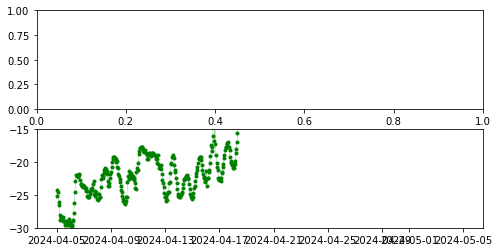

In [72]:
dfA = df2[df2.sourceId=='SN99927:0']
dfB = df2[df2.sourceId=='SN99935:0']
dfC = df2[df2.sourceId=='SN99938:0']

fig, ax = plt.subplots(figsize=(8, 4),nrows=2,ncols=1)

#ax[1].plot(dfA.referenceTime.values,dfA.value.values,marker='.',linewidth=0.2,color='k')
ax[1].plot(dfB.referenceTime.values,dfB.value.values,marker='.',linewidth=0.2,color='g')
#ax[1].plot(dfC.referenceTime.values,dfC.value.values,marker='.',linewidth=0.2,color='r')

ax[1].set_ylim(ymin=-30, ymax=-15)

In [69]:
df2.to_pickle('tmpInSitu.pkl')    #to save the dataframe, df to 123.pkl
#df1 = pd.read_pickle('123.pkl') #to load 123.pkl back to the dataframe df